<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.077352,50.382343,90.805366,39.915192,0.198439,221.378692,221.346692,0.032000
1,0.0,1.0,31.147823,65.689149,79.467904,41.696642,0.352101,228.353619,228.139455,0.214164
2,0.0,2.0,29.918072,68.022615,71.198941,75.142459,0.376302,254.658389,254.397585,0.260804
3,0.0,3.0,73.007840,41.396161,88.951109,72.957344,0.230400,286.542853,286.396527,0.146326
4,0.0,4.0,61.418599,73.545978,91.478141,76.633725,-0.102669,312.973772,313.211307,-0.237535
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,29.181833,34.335367,79.374510,45.641379,-0.022180,198.510908,198.588894,-0.077986
59996,999.0,56.0,27.812404,45.375379,28.096703,60.674016,0.149725,172.108226,171.933292,0.174935
59997,999.0,57.0,94.728280,60.521107,45.670668,42.105226,-0.092828,252.932453,253.001060,-0.068607
59998,999.0,58.0,32.285660,43.452563,47.479384,82.283920,-0.097051,215.404476,215.526217,-0.121741


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.077352  50.382343  90.805366  39.915192  0.198439  221.378692   
      1.0    31.147823  65.689149  79.467904  41.696642  0.352101  228.353619   
      2.0    29.918072  68.022615  71.198941  75.142459  0.376302  254.658389   
      3.0    73.007840  41.396161  88.951109  72.957344  0.230400  286.542853   
      4.0    61.418599  73.545978  91.478141  76.633725 -0.102669  312.973772   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   29.181833  34.335367  79.374510  45.641379 -0.022180  198.510908   
      56.0   27.812404  45.375379  28.096703  60.674016  0.149725  172.108226   
      57.0   94.728280  60.521107  45.670668  42.105226 -0.092828  252.932453   
      58.0   32.285660  43.452563  47.479384  82.283920 -0.097051  215.404476   
      59.0   91.893669  53.807815  85.427542  62.402372  0.046363  303.577762   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    221.346692  0.032000  
      1.0    228.139455  0.214164  
      2.0    254.397585  0.260804  
      3.0    286.396527  0.146326  
      4.0    313.211307 -0.237535  
...                 ...       ...  
999.0 55.0   198.588894 -0.077986  
      56.0   171.933292  0.174935  
      57.0   253.001060 -0.068607  
      58.0   215.526217 -0.121741  
      59.0   303.593343 -0.015582  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.077352  50.382343  90.805366  39.915192  0.198439  221.378692   
      1.0    31.147823  65.689149  79.467904  41.696642  0.352101  228.353619   
      2.0    29.918072  68.022615  71.198941  75.142459  0.376302  254.658389   
      3.0    73.007840  41.396161  88.951109  72.957344  0.230400  286.542853   
      4.0    61.418599  73.545978  91.478141  76.633725 -0.102669  312.973772   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   29.181833  34.335367  79.374510  45.641379 -0.022180  198.510908   
      56.0   27.812404  45.375379  28.096703  60.674016  0.149725  172.108226   
      57.0   94.728280  60.521107  45.670668  42.105226 -0.092828  252.932453   
      58.0   32.285660  43.452563  47.479384  82.283920 -0.097051  215.404476   
      59.0   91.893669  53.807815  85.427542  62.402372  0.046363  303.577762   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    221.346692  0.032000  
      1.0    228.139455  0.214164  
      2.0    254.397585  0.260804  
      3.0    286.396527  0.146326  
      4.0    313.211307 -0.237535  
...                 ...       ...  
999.0 55.0   198.588894 -0.077986  
      56.0   171.933292  0.174935  
      57.0   253.001060 -0.068607  
      58.0   215.526217 -0.121741  
      59.0   303.593343 -0.015582  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.077352,50.382343,90.805366,39.915192,0.198439,221.378692,221.346692,0.032000
1,0.0,1.0,31.147823,65.689149,79.467904,41.696642,0.352101,228.353619,228.139455,0.214164
2,0.0,2.0,29.918072,68.022615,71.198941,75.142459,0.376302,254.658389,254.397585,0.260804
3,0.0,3.0,73.007840,41.396161,88.951109,72.957344,0.230400,286.542853,286.396527,0.146326
4,0.0,4.0,61.418599,73.545978,91.478141,76.633725,-0.102669,312.973772,313.211307,-0.237535
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,29.181833,34.335367,79.374510,45.641379,-0.022180,198.510908,198.588894,-0.077986
59996,999.0,56.0,27.812404,45.375379,28.096703,60.674016,0.149725,172.108226,171.933292,0.174935
59997,999.0,57.0,94.728280,60.521107,45.670668,42.105226,-0.092828,252.932453,253.001060,-0.068607
59998,999.0,58.0,32.285660,43.452563,47.479384,82.283920,-0.097051,215.404476,215.526217,-0.121741


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.077352  50.382343  90.805366  39.915192  0.198439  221.378692   
      1.0    31.147823  65.689149  79.467904  41.696642  0.352101  228.353619   
      2.0    29.918072  68.022615  71.198941  75.142459  0.376302  254.658389   
      3.0    73.007840  41.396161  88.951109  72.957344  0.230400  286.542853   
      4.0    61.418599  73.545978  91.478141  76.633725 -0.102669  312.973772   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   29.181833  34.335367  79.374510  45.641379 -0.022180  198.510908   
      56.0   27.812404  45.375379  28.096703  60.674016  0.149725  172.108226   
      57.0   94.728280  60.521107  45.670668  42.105226 -0.092828  252.932453   
      58.0   32.285660  43.452563  47.479384  82.283920 -0.097051  215.404476   
      59.0   91.893669  53.807815  85.427542  62.402372  0.046363  303.577762   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    221.346692  0.032000  
      1.0    228.139455  0.214164  
      2.0    254.397585  0.260804  
      3.0    286.396527  0.146326  
      4.0    313.211307 -0.237535  
...                 ...       ...  
999.0 55.0   198.588894 -0.077986  
      56.0   171.933292  0.174935  
      57.0   253.001060 -0.068607  
      58.0   215.526217 -0.121741  
      59.0   303.593343 -0.015582  

[60000 rows x 8 columns]

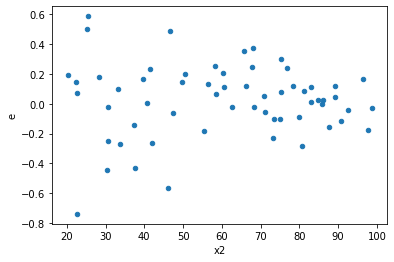

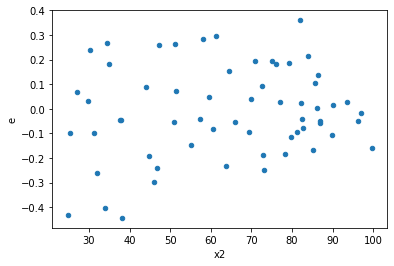

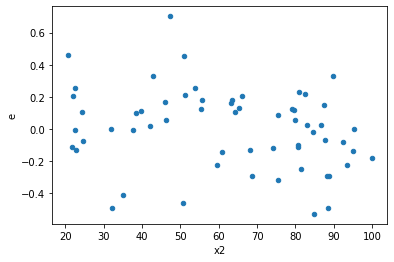

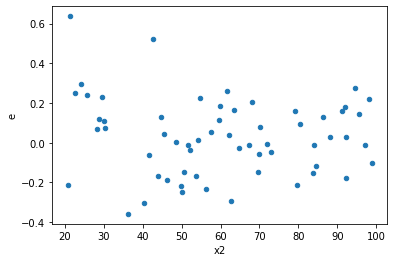

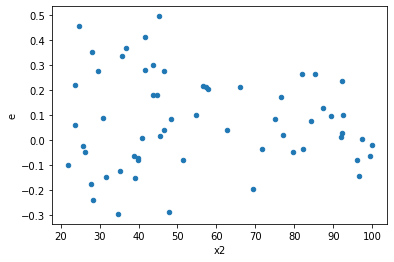

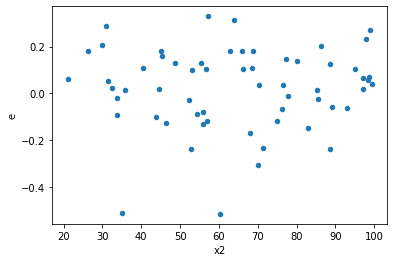

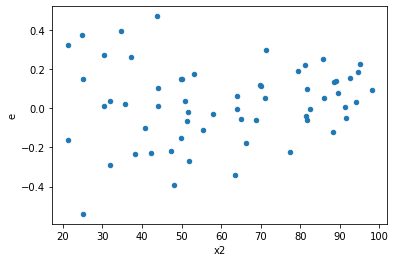

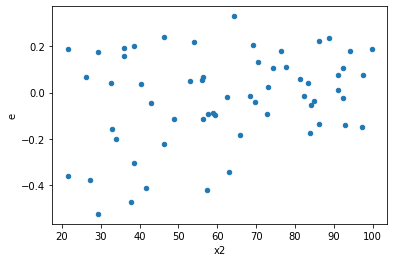

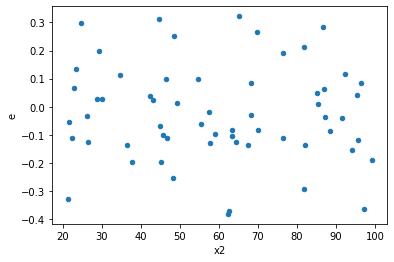

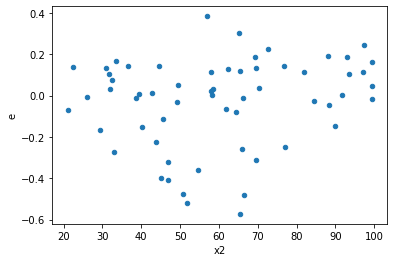

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,32.0,0.5128432159483729,1.2626721647293428,0.025642160797418646,0.039458505147791964,1.5388135757952266,0.2697502030555736,0.8651248984722132,0.1348751015277868,Reject001=1 : Homoscedasticity
2.0,26.0,26.0,0.8754433192888755,2.1301705037009087,0.033670896895725985,0.08192963475772726,2.433247769177393,0.027082993265593158,0.9864585033672034,0.013541496632796579,Reject001=1 : Homoscedasticity
6.0,23.0,29.0,0.7619739577996784,1.1924695295661107,0.03312930251302949,0.041119638950555544,1.2411863767546423,0.5762140371250306,0.7118929814374847,0.2881070185625153,Reject001=1 : Homoscedasticity
8.0,23.0,29.0,0.41407906083282947,1.0886111755358685,0.018003437427514323,0.03753831639778857,2.0850638412206464,0.06235017965062495,0.9688249101746875,0.031175089825312474,Reject001=1 : Homoscedasticity
9.0,30.0,22.0,1.025361831630978,1.3769720232845688,0.0341787277210326,0.06258963742202585,1.831245385518256,0.14549556423849164,0.9272522178807542,0.07274778211924582,Reject001=1 : Homoscedasticity
11.0,20.0,32.0,0.3238030287140711,1.797801352020047,0.016190151435703553,0.05618129225062647,3.47009059635674,0.0016988086225395715,0.9991505956887302,0.0008494043112697858,Reject001=0 : Heteroscedasticity
12.0,23.0,29.0,0.8823483597984417,1.5670304255180483,0.03836297216514964,0.05403553191441546,1.4085335119968456,0.37994031902283876,0.8100298404885806,0.18997015951141938,Reject001=1 : Homoscedasticity
13.0,22.0,30.0,0.8599443325996887,1.6233399955790315,0.039088378754531306,0.05411133318596772,1.384333014315537,0.40267821929918535,0.7986608903504073,0.20133910964959267,Reject001=1 : Homoscedasticity
14.0,20.0,32.0,0.8961234098819809,1.7958840818357669,0.044806170494099046,0.056121377557367715,1.2525368032681765,0.5561706741423444,0.7219146629288278,0.2780853370711722,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,33.0,19.0,2.368468514815793,0.3843227202426267,0.07177177317623616,0.020227511591717196,0.2818310137336078,0.001409748344590399,Reject001=0 : Heteroscedasticity
1.0,20.0,32.0,0.5128432159483729,1.2626721647293428,0.025642160797418646,0.039458505147791964,1.5388135757952266,0.2697502030555736,Reject001=1 : Homoscedasticity
2.0,26.0,26.0,0.8754433192888755,2.1301705037009087,0.033670896895725985,0.08192963475772726,2.433247769177393,0.027082993265593158,Reject001=1 : Homoscedasticity
3.0,25.0,27.0,1.2624795393154147,0.43976483894350543,0.05049918157261659,0.016287586627537237,0.32253169497640444,0.005759912695699356,Reject001=0 : Heteroscedasticity
4.0,32.0,20.0,1.1287447224458416,0.6583025420549945,0.03527327257643255,0.03291512710274973,0.9331463938149479,0.8402409823910187,Reject001=1 : Homoscedasticity
5.0,37.0,15.0,1.0791042796758414,0.3697388327632035,0.0291649805317795,0.0246492555175469,0.8451661913742045,0.6524431784753426,Reject001=1 : Homoscedasticity
6.0,23.0,29.0,0.7619739577996784,1.1924695295661107,0.03312930251302949,0.041119638950555544,1.2411863767546423,0.5762140371250306,Reject001=1 : Homoscedasticity
7.0,22.0,30.0,0.9317849971393956,1.0352001972318219,0.04235386350633616,0.03450667324106073,0.8147231535535953,0.6257983180130632,Reject001=1 : Homoscedasticity
8.0,23.0,29.0,0.41407906083282947,1.0886111755358685,0.018003437427514323,0.03753831639778857,2.0850638412206464,0.06235017965062495,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      957
Reject001=0 : Heteroscedasticity     43
Name: Result_test, dtype: int64